# Libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Reading Data

In [2]:
file_pattern = 'C:/Users/math_/OneDrive/GitHub-Projects/Kaggle-competition-neo-bank-churn-prediction/data/train_*.parquet' 
all_files = glob.glob(file_pattern)

In [3]:
df = pd.concat([pd.read_parquet(file) for file in all_files], ignore_index=True)

In [4]:
display(df)

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926053,4312990,106182,2.5,Joshua Pratt,Lithuania,1998-12-27,"1801 Stephanie Plains\nSouth Emmamouth, VA 679...",2023-12-31,0,0,...,44.453468,13.598973,0,"[appointment, whatsapp, appointment]","{'appointment': None, 'email': None, 'phone': ...",0,False,"Lecturer, further education",False,False
3926054,4312991,106183,2.5,Ryan Nguyen,Slovakia,1977-04-15,"187 Hamilton Mission\nSarahtown, FM 66596 Slov...",2023-12-31,0,0,...,107.129867,22.901361,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,unemployed,False,False
3926055,4312992,106184,2.5,Rachel Smith,Czech Republic,1983-06-11,"07730 Melissa Highway\nMichaelfurt, AR 77003 C...",2023-12-31,0,0,...,39.528098,12.530001,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,unemployed,False,False
3926056,4312993,106185,2.5,Amanda Collins,Greece,1941-08-27,"352 Sharon Burg\nVictorfurt, KS 47610 Greece",2023-12-31,1,0,...,121.818096,17.939870,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,"Psychologist, occupational",False,False


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926058 entries, 0 to 3926057
Data columns (total 26 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             object        
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

In [6]:
print('columns on dataset:')
df.columns

columns on dataset:


Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud'],
      dtype='object')

In [7]:
print('years of train dataset:')
list(map(lambda f: int(f[-12:-8]), all_files))

years of train dataset:


[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [8]:
print('number of customers:')
len(df['customer_id'].unique())

number of customers:


106179

In [9]:
print('number of churn:')
df['churn_due_to_fraud'].value_counts()

number of churn:


churn_due_to_fraud
False    3926031
True          27
Name: count, dtype: int64

In [10]:
df['model_predicted_fraud'].value_counts()

model_predicted_fraud
False    3924306
True        1752
Name: count, dtype: int64

In [11]:
print('customers per countries:')
df.groupby('country')['customer_id'].nunique().sort_values(ascending=False)

customers per countries:


country
Latvia            4383
Czech Republic    4330
Netherlands       4329
Germany           4329
Denmark           4323
Sweden            4314
Greece            4313
Finland           4308
Switzerland       4289
USA               4272
Ireland           4252
Spain             4249
Norway            4245
Slovakia          4239
Poland            4229
Austria           4225
Belgium           4221
Romania           4221
Lithuania         4203
Bulgaria          4193
France            4160
Italy             4159
Estonia           4155
Hungary           4150
Portugal          4088
Name: customer_id, dtype: int64

In [12]:
def bar_plot(data, figure_size, x_label, y_label, fig_title, bar_color='blue'):

    plt.figure(figsize=figure_size)
    plt.bar(data.index, data.values, color=bar_color, alpha=0.8, edgecolor='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(fig_title)

    plt.xticks(ticks=data.index)

    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

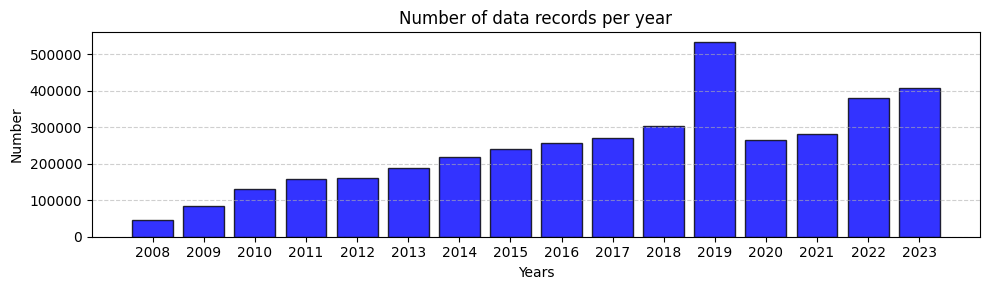

In [13]:
bar_plot(df['date'].dt.year.value_counts().sort_index(),
        (10,3),
        'Years',
        'Number',
        'Number of data records per year')

In [14]:
def line_plot(data, value, figure_size, x_label, y_label, fig_title):

    agg_data = data.groupby('date')[value].sum().reset_index()
    agg_data = agg_data[agg_data['date'] >= pd.to_datetime('2008-01-17')]

    plt.figure(figsize=figure_size)
    plt.plot(agg_data['date'], agg_data[value], color='black', linewidth=1)
    plt.fill_between(agg_data['date'], agg_data[value], color='gray', alpha=0.2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(fig_title)
    plt.grid(True, linestyle='--', alpha=0.6)

    years = agg_data['date'].dt.year.unique()
    plt.xticks(ticks=pd.to_datetime([f"{year}-01-01" for year in years]), labels=years)
    
    plt.tight_layout()
    plt.show()


### ATM transfers over the years


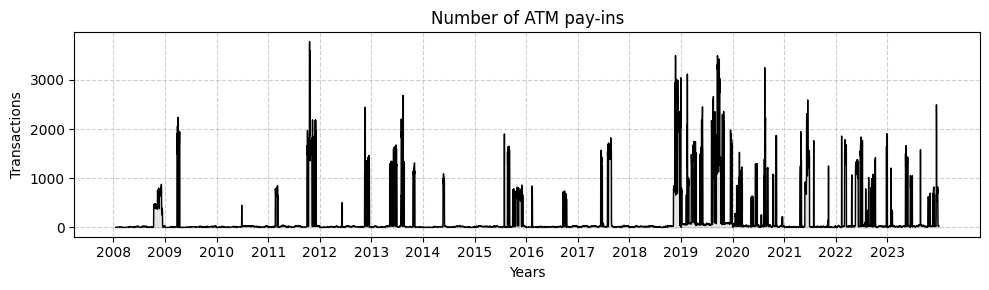

In [15]:
line_plot(df,
         'atm_transfer_in',
        (10,3),
        'Years',
        'Transactions',
        'Number of ATM pay-ins')

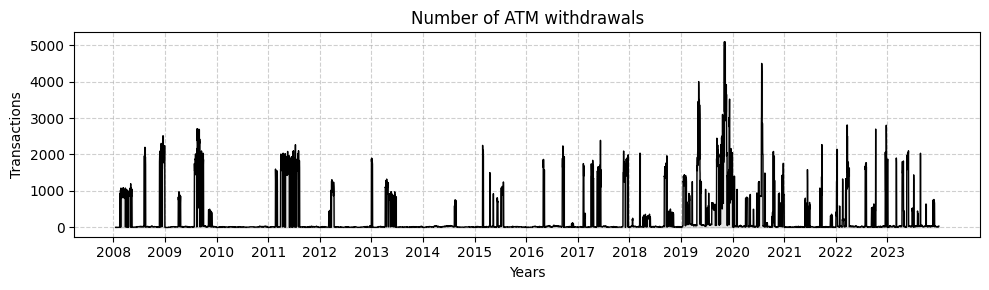

In [16]:
line_plot(df,
         'atm_transfer_out',
        (10,3),
        'Years',
        'Transactions',
        'Number of ATM withdrawals')

### Bank transfers over the years


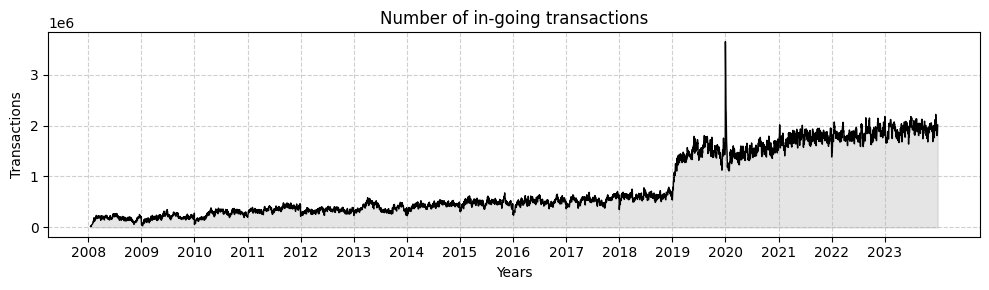

In [17]:
line_plot(df,
         'bank_transfer_in',
        (10,3),
        'Years',
        'Transactions',
        'Number of in-going transactions')

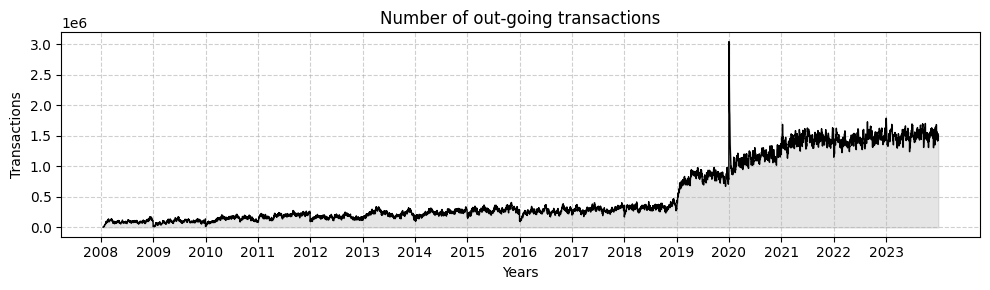

In [18]:
line_plot(df,
         'bank_transfer_out',
        (10,3),
        'Years',
        'Transactions',
        'Number of out-going transactions')

### Bank transfers volume over the years

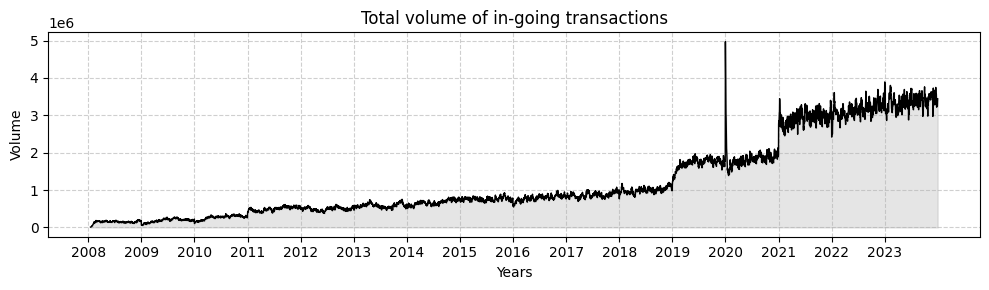

In [19]:
line_plot(df,
         'bank_transfer_in_volume',
        (10,3),
        'Years',
        'Volume',
        'Total volume of in-going transactions')

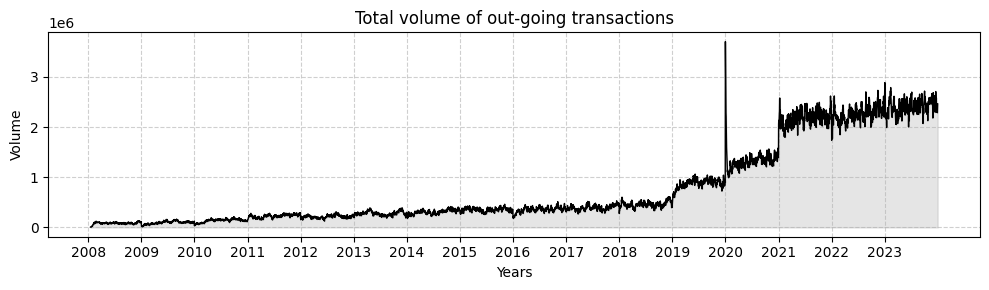

In [20]:
line_plot(df,
         'bank_transfer_out_volume',
        (10,3),
        'Years',
        'Volume',
        'Total volume of out-going transactions')

### Crypto transfers over the years

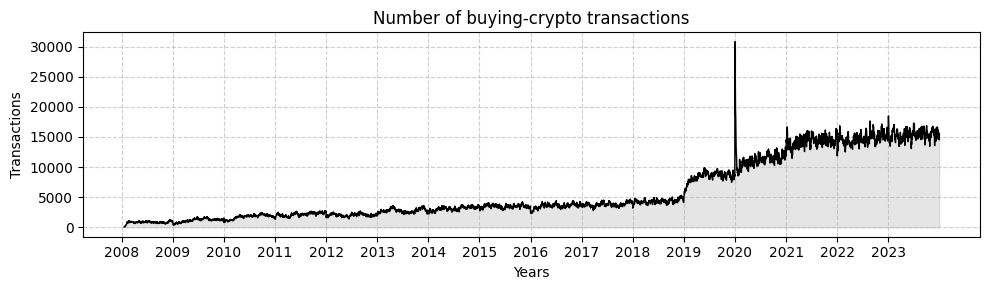

In [21]:
line_plot(df,
         'crypto_in',
        (10,3),
        'Years',
        'Transactions',
        'Number of buying-crypto transactions')

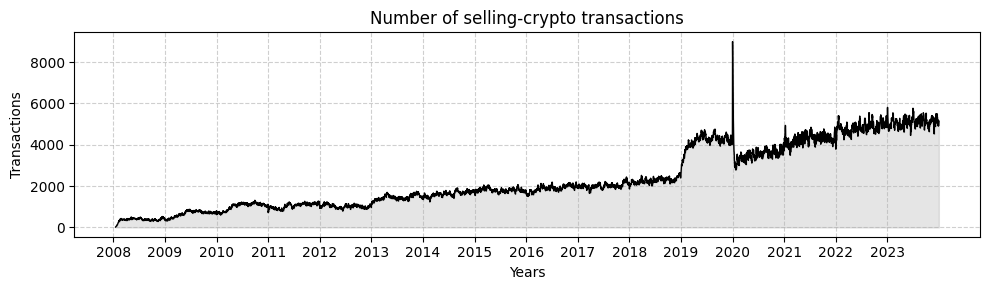

In [22]:
line_plot(df,
         'crypto_out',
        (10,3),
        'Years',
        'Transactions',
        'Number of selling-crypto transactions')

### Crypto transfers volume over the years

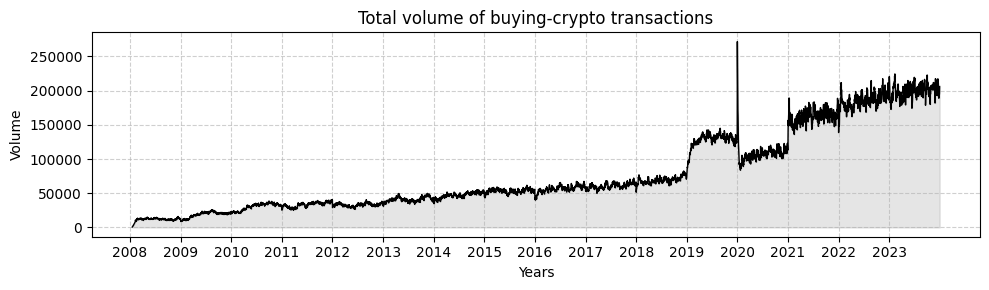

In [23]:
line_plot(df,
         'crypto_in_volume',
        (10,3),
        'Years',
        'Volume',
        'Total volume of buying-crypto transactions')

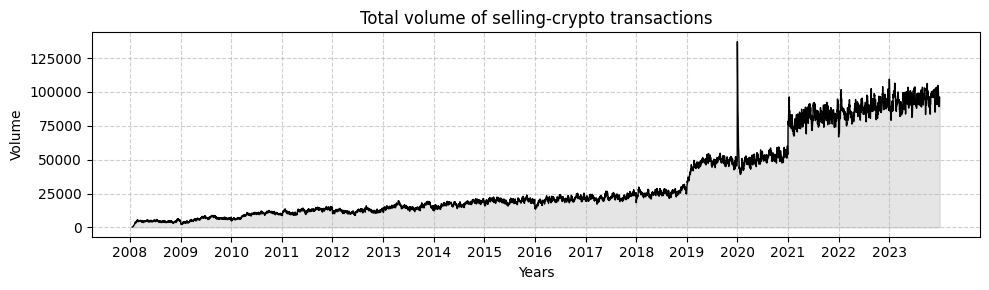

In [24]:
line_plot(df,
         'crypto_out_volume',
        (10,3),
        'Years',
        'Volume',
        'Total volume of selling-crypto transactions')

In [25]:
def histogram_plot(data, figure_size, bins_value, x_label, y_label, fig_title, color='blue', alpha=0.8):

    plt.figure(figsize=figure_size)
    plt.hist(data, bins=bins_value, color=color, alpha=alpha, edgecolor='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(fig_title)

    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


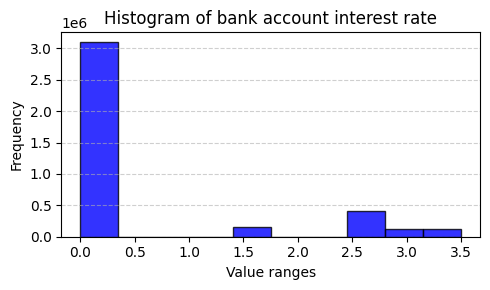

In [26]:
histogram_plot(df['interest_rate'], 
               (5,3), 
               10, 
               'Value ranges', 
               'Frequency', 
               'Histogram of bank account interest rate')

# Define RFM

- **Recency**: The freshness of the customer activity, be it purchases or visits
- **Frequency**: The frequency of the customer transactions or visits
- **Monetary**: The intention of customer to spend or purchasing power of customer

In [27]:
print('Sorting df by customer id and date:')

df = df.sort_values(by=['customer_id', 'date'])

Sorting df by customer id and date:


In [67]:
df_select = df[['Id', 'customer_id', 'date']]

In [69]:
df_analytics = df_select.copy()

# Sort the data by customer_id and date
df_analytics = df_analytics.sort_values(by=['customer_id', 'date'])

# Use .loc to explicitly assign values to specific columns
df_analytics['last_activity'] = df_analytics.groupby('customer_id')['date'].shift(1)

df_analytics['days_inactive'] = (df_analytics['date'] - df_analytics['last_activity']).dt.days

df_analytics['days_inactive'] = df_analytics['days_inactive'].fillna(0)


In [71]:
df_analytics

,Id,customer_id,date,last_activity,days_inactive
0,1,1,2008-01-17,NaT,0.0
1,6,1,2008-01-18,2008-01-17,1.0
2,16,1,2008-01-19,2008-01-18,1.0
3,31,1,2008-01-20,2008-01-19,1.0
4,50,1,2008-01-21,2008-01-20,1.0
...,...,...,...,...,...
3926053,4312990,106182,2023-12-31,NaT,0.0
3926054,4312991,106183,2023-12-31,NaT,0.0
3926055,4312992,106184,2023-12-31,NaT,0.0
3926056,4312993,106185,2023-12-31,NaT,0.0


In [72]:
df_analytics.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

,Id,customer_id,date,last_activity,days_inactive
count,3.926058e+06,3.926058e+06,3926058,3819879,3.926058e+06
mean,2.163620e+06,2.976524e+04,2017-12-14 20:10:30.715083520,2017-10-29 04:41:21.963852288,3.335848e+01
min,1.000000e+00,1.000000e+00,2008-01-17 00:00:00,2008-01-17 00:00:00,0.000000e+00
1%,4.342457e+04,2.900000e+02,2008-11-08 00:00:00,2008-10-31 00:00:00,0.000000e+00
25%,1.084868e+06,8.906000e+03,2014-12-28 00:00:00,2014-11-20 00:00:00,1.000000e+00
50%,2.167208e+06,2.162400e+04,2018-09-12 00:00:00,2018-07-22 00:00:00,1.000000e+00
75%,3.243858e+06,4.512700e+04,2021-04-29 00:00:00,2021-02-01 00:00:00,1.000000e+00
80%,3.457065e+06,5.174700e+04,2022-01-04 00:00:00,2021-10-10 00:00:00,1.000000e+00
85%,3.671347e+06,6.128445e+04,2022-07-13 00:00:00,2022-05-07 00:00:00,2.000000e+00
90%,3.885311e+06,7.142600e+04,2023-01-14 00:00:00,2022-11-08 00:00:00,2.000000e+00


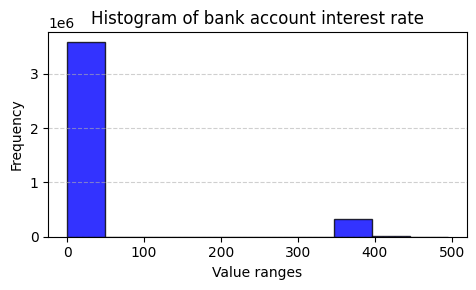

In [75]:
histogram_plot(df_analytics['days_inactive'], 
               (5,3), 
               10, 
               'Value ranges', 
               'Frequency', 
               'Histogram of bank account interest rate')

In [77]:
df_analytics = pd.merge(df_analytics,
                        df[['Id', 'atm_transfer_in', 'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out', 'crypto_in', 'crypto_out']],
                        on='Id',
                        how='left')

In [79]:
df_analytics['total_transactions'] = sum([df_analytics['atm_transfer_in'], df_analytics['atm_transfer_out'], df_analytics['bank_transfer_in'], df_analytics['bank_transfer_out'], df_analytics['crypto_in'], df_analytics['crypto_out']])

In [80]:
df_analytics

,Id,customer_id,date,last_activity,days_inactive,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,total_transactions
0,1,1,2008-01-17,NaT,0.0,0,0,17476,3911,56,13,21456
1,6,1,2008-01-18,2008-01-17,1.0,0,0,19680,3358,46,14,23098
2,16,1,2008-01-19,2008-01-18,1.0,0,0,17958,4113,48,13,22132
3,31,1,2008-01-20,2008-01-19,1.0,0,0,22772,3750,49,15,26586
4,50,1,2008-01-21,2008-01-20,1.0,0,0,23610,4005,60,12,27687
...,...,...,...,...,...,...,...,...,...,...,...,...
3926053,4312990,106182,2023-12-31,NaT,0.0,0,0,597,107,1,1,706
3926054,4312991,106183,2023-12-31,NaT,0.0,0,0,2,959,1,1,963
3926055,4312992,106184,2023-12-31,NaT,0.0,0,0,1,2,5,7,15
3926056,4312993,106185,2023-12-31,NaT,0.0,1,0,2,2,1,1,7


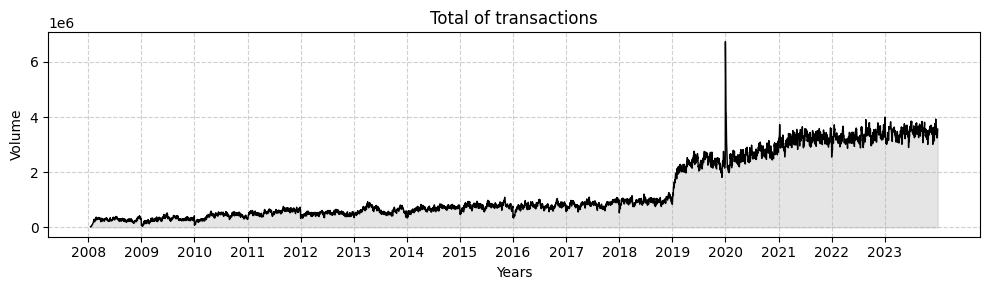

In [87]:
line_plot(df_analytics,
         'total_transactions',
        (10,3),
        'Years',
        'Volume',
        'Total of transactions')

In [83]:
df_analytics = pd.merge(df_analytics,
                        df[['Id', 'bank_transfer_in_volume', 'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume']],
                        on='Id',
                        how='left')

In [85]:
df_analytics['total_volume'] = sum([df_analytics['bank_transfer_in_volume'], df_analytics['bank_transfer_out_volume'], df_analytics['crypto_in_volume'], df_analytics['crypto_out_volume']])

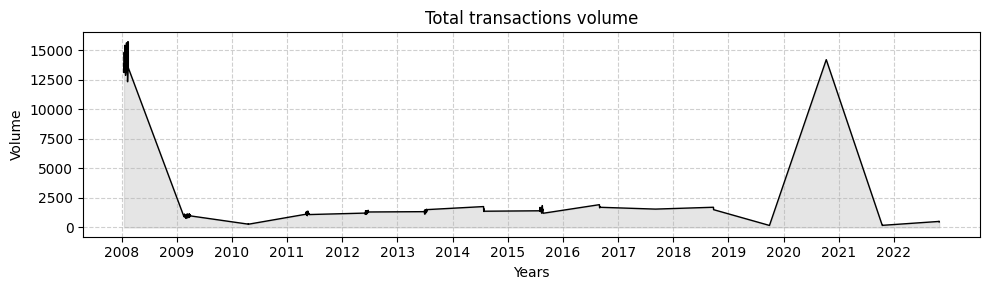

In [97]:
line_plot((df_analytics[df_analytics['customer_id']==1]),
         'total_volume',
        (10,3),
        'Years',
        'Volume',
        'Total transactions volume')

In [98]:
df_rfm = df_analytics[['Id', 'customer_id', 'date', 'days_inactive', 'total_transactions', 'total_volume']].copy()

In [99]:
df_rfm

,Id,customer_id,date,days_inactive,total_transactions,total_volume
0,1,1,2008-01-17,0.0,21456,13838.322396
1,6,1,2008-01-18,1.0,23098,13102.274335
2,16,1,2008-01-19,1.0,22132,14826.027204
3,31,1,2008-01-20,1.0,26586,14121.863625
4,50,1,2008-01-21,1.0,27687,13186.063417
...,...,...,...,...,...,...
3926053,4312990,106182,2023-12-31,0.0,706,872.121088
3926054,4312991,106183,2023-12-31,0.0,963,257.416669
3926055,4312992,106184,2023-12-31,0.0,15,92.569818
3926056,4312993,106185,2023-12-31,0.0,7,250.443573


In [76]:
df.head(10)

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False
5,102,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-23,0,0,...,341.282736,171.205073,0,[],"{'appointment': None, 'email': None, 'phone': ...",6,False,Amenity horticulturist,False,False
6,134,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-24,0,0,...,378.111975,204.183903,0,[],"{'appointment': None, 'email': None, 'phone': ...",7,False,Amenity horticulturist,False,False
7,171,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-25,0,0,...,407.930587,197.097479,0,[],"{'appointment': None, 'email': None, 'phone': ...",8,False,Amenity horticulturist,False,False
8,211,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-26,0,0,...,377.328868,218.909579,0,[],"{'appointment': None, 'email': None, 'phone': ...",9,False,Amenity horticulturist,False,False
9,254,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-27,0,0,...,454.863033,195.062883,0,[],"{'appointment': None, 'email': None, 'phone': ...",10,False,Amenity horticulturist,False,False


In [28]:
(df[df['customer_id']==1]).sort_values(by='date')

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856120,3392777,1,0.0,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2021-10-20,0,0,...,80.986846,25.900938,0,"[appointment, whatsapp, email]","{'appointment': None, 'email': None, 'phone': ...",5025,False,Amenity horticulturist,False,False
2856121,3393638,1,0.0,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2021-10-21,0,0,...,86.204164,24.859711,0,[],"{'appointment': None, 'email': None, 'phone': ...",5026,False,Amenity horticulturist,False,False
3138366,3790639,1,0.0,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2022-10-26,0,0,...,273.739825,40.873563,0,[],"{'appointment': None, 'email': None, 'phone': ...",5396,False,Amenity horticulturist,False,False
3138367,3791762,1,0.0,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2022-10-27,0,0,...,243.029802,35.051230,0,[],"{'appointment': None, 'email': None, 'phone': ...",5397,False,Amenity horticulturist,False,False
